In [56]:
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt

start= dt.datetime(2007,1,1) #데이터 마지노선
end=dt.date.today()
#주가수정비율 반영 -> adjust_price=True
s=web.YahooDailyReader('000660.KS',start,end,adjust_price=True).read() #sk하이닉스 종목, KS:코스피, KQ:코스닥
print(s.head(15))
s.tail()
s=web.YahooDailyReader('005490.KS',start,end,adjust_price=True).read() #POSCO
s.tail()

                    High           Low          Open         Close  \
Date                                                                 
2007-01-02  29933.609247  29256.017560  29415.450898  29853.892578   
2007-01-03  30053.181743  29455.306775  29933.606750  29535.023438   
2007-01-04  29933.607806  29375.591149  29574.882812  29574.882812   
2007-01-05  29933.609247  29016.867553  29814.034244  29853.892578   
2007-01-08  29774.175928  29096.584240  29654.600924  29256.017578   
2007-01-09  29574.883202  29096.583204  29295.874869  29216.158203   
2007-01-10  29574.882010  28777.715379  29495.165347  29096.582031   
2007-01-11  29455.312707  28777.720940  29375.596029  28937.154297   
2007-01-12  29136.444151  28379.135753  29056.727477  29016.869141   
2007-01-15  29495.165347  28977.007037  29096.582031  29096.582031   
2007-01-16  29096.584129  28418.992444  29016.867460  28578.425781   
2007-01-17  28538.565306  27302.957031  28538.565306  27302.957031   
2007-01-18  27382.67

,High,Low,Open,Close,Volume,Adj_Ratio
Date,,,,,,
2019-01-29,268500.0,264000.0,266000.0,268500.0,180807.0,1.0
2019-01-30,285000.0,271000.0,274500.0,285000.0,549605.0,1.0
2019-01-31,289000.0,274000.0,288500.0,274000.0,408983.0,1.0
2019-02-01,275500.0,270000.0,273000.0,270500.0,274201.0,1.0
2019-02-18,267500.0,262000.0,265500.0,262500.0,268279.0,1.0


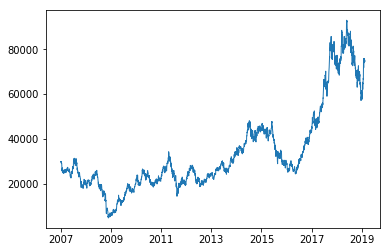

In [24]:
plt.plot(s['Close'],linewidth=1)

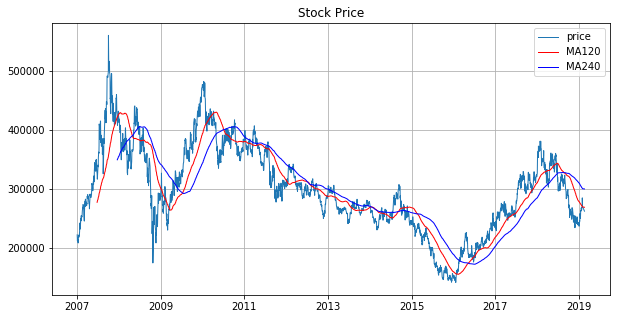

In [57]:
s['sma120']=s['Close'].rolling(window=120).mean()
s['sma240']=s['Close'].rolling(window=240).mean()

plt.figure(1,figsize=(10,5))
plt.plot(s['Close'],linewidth=1, label="price")
plt.plot(s['sma120'],linewidth=1,c='r', label="MA120")
plt.plot(s['sma240'],linewidth=1,c='b', label="MA240")
plt.title("Stock Price")
plt.grid()
plt.legend()
plt.show()

### 일일수익률 계산 p.8

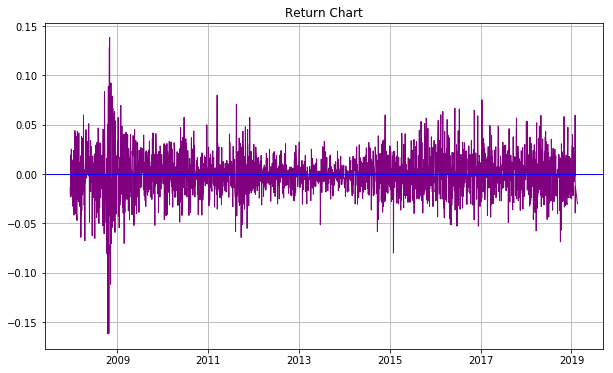

In [58]:
import numpy as np
s['Rtn']=np.log(s['Close'])-np.log(s['Close'].shift(1))
s=s.dropna()

plt.figure(figsize=(10,6))
plt.plot(s['Rtn'],c='purple',linewidth=1)
plt.axhline(y=0,c='b',linewidth=1)
plt.title("Return Chart")
plt.grid()

### 수익률 분포(일일수익률 그래프를 세로로 회전시켰을 때)

Bin:-0.0478, Frequency=11
Bin:-0.0448, Frequency=14
Bin:-0.0418, Frequency=23
Bin:-0.0388, Frequency=18
Bin:-0.0358, Frequency=22
Bin:-0.0328, Frequency=43
Bin:-0.0298, Frequency=56
Bin:-0.0268, Frequency=63
Bin:-0.0238, Frequency=75
Bin:-0.0208, Frequency=81
Bin:-0.0178, Frequency=87
Bin:-0.0148, Frequency=141
Bin:-0.0118, Frequency=139
Bin:-0.0088, Frequency=152
Bin:-0.0058, Frequency=215
Bin:-0.0028, Frequency=280
Bin:0.0003, Frequency=183
Bin:0.0033, Frequency=192
Bin:0.0063, Frequency=171
Bin:0.0093, Frequency=130
Bin:0.0123, Frequency=112
Bin:0.0153, Frequency=102
Bin:0.0183, Frequency=86
Bin:0.0213, Frequency=66
Bin:0.0243, Frequency=56
Bin:0.0273, Frequency=44
Bin:0.0303, Frequency=37
Bin:0.0333, Frequency=22
Bin:0.0363, Frequency=18
Bin:0.0393, Frequency=16
Bin:0.0423, Frequency=13


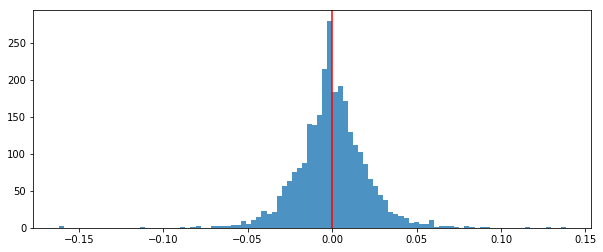

In [62]:
plt.figure(figsize=(10,4))
n,bins,patched=plt.hist(s['Rtn'],bins=100,alpha=0.8)
plt.axvline(s['Rtn'].mean(),c='r')

#각 구간의 빈도
for index in range(len(n)):
    if (n[index] >10):
        print("Bin:%.4f, Frequency=%d" % (bins[index],n[index]))

In [60]:
s['Rtn'].mean()*252

-0.043621599231902876

In [61]:
s['Rtn'].std()*(252**(1/2))

0.33000045946361867